# Procesamiento de datos del SUACI

Autores: Luca Mazzarello e Ignacio Pardo

## 1. Importación de librerías

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

## 2. Carga de datos

In [47]:
data_2022 = pd.read_csv('suaci/sistema-unico-de-atencion-ciudadana-2022.csv', sep=';')
data_2021 = pd.read_csv('suaci/sistema-unico-de-atencion-ciudadana-2021.csv', sep=';')
data_2020 = pd.read_csv('suaci/sistema-unico-de-atencion-ciudadana-2020.csv', sep=',')
data_2019 = pd.read_csv('suaci/sistema-unico-de-atencion-ciudadana-2019.csv', sep=',')
data_2018 = pd.read_csv('suaci/sistema-unico-de-atencion-ciudadana-2018.csv', sep=',')

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_11184/4153471760.py:2: DtypeWarning: Columns (10,12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('suaci/sistema-unico-de-atencion-ciudadana-2021.csv', sep=';')
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_11184/4153471760.py:3: DtypeWarning: Columns (8,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2020 = pd.read_csv('suaci/sistema-unico-de-atencion-ciudadana-2020.csv', sep=',')


In [48]:
datas = [data_2022, data_2021, data_2020, data_2019, data_2018]
sizes = [len(d) for d in datas]
sizes

[104912, 754638, 574435, 989629, 893291]

## 3. Preprocesamiento

Conteo de denuncias por barrio para el año 2022.

In [49]:
# Count denuncias por barrio
barrio_counts_2022 = data_2022['domicilio_barrio'].value_counts()

In [50]:
bcdf = pd.DataFrame(barrio_counts_2022)

#Change keys to domicilio_barrio,count

# make index a column

bcdf = bcdf.reset_index()

# rename columns

bcdf.columns = ['domicilio_barrio', 'count']


In [51]:
bcdf.to_csv('barrio_counts_2022.csv', index=False)

### 3.1. Limpieza de datos de mosquitos

In [52]:
mosquitos_2022 = data_2022[data_2022['subcategoria'] == 'ENFERMEDADES TRANSMITIDAS POR MOSQUITOS']
barrios_ms_2022 = mosquitos_2022['domicilio_barrio'].value_counts()[0:10][::-1]
barrios_ms_2022 = mosquitos_2022['domicilio_barrio'].value_counts()[0:10][::-1]

In [53]:
mosquitos_2021 = data_2021[data_2021['subcategoria'] == 'ENFERMEDADES TRANSMITIDAS POR MOSQUITOS']
barrios_ms_2021 = mosquitos_2021['domicilio_barrio'].value_counts()[0:10][::-1]
barrios_ms_2021 = mosquitos_2021['domicilio_barrio'].value_counts()[0:10][::-1]

In [54]:
mosquitos_2020 = data_2020[data_2020['subcategoria'] == 'ENFERMEDADES TRANSMITIDAS POR MOSQUITOS']
barrios_ms_2020 = mosquitos_2020['domicilio_barrio'].value_counts()[0:10][::-1]
barrios_ms_2020 = mosquitos_2020['domicilio_barrio'].value_counts()[0:10][::-1]

In [55]:
mosquitos_2019 = data_2019[data_2019['subcategoria'] == 'ENFERMEDADES TRANSMITIDAS POR MOSQUITOS']
barrios_ms_2019 = mosquitos_2019['domicilio_barrio'].value_counts()[0:10][::-1]
barrios_ms_2019 = mosquitos_2019['domicilio_barrio'].value_counts()[0:10][::-1]

In [56]:
mosquitos_2019 = data_2019[data_2019['subcategoria'] == 'ENFERMEDADES TRANSMITIDAS POR MOSQUITOS']
barrios_ms_2019 = mosquitos_2019['domicilio_barrio'].value_counts()[0:10][::-1]
barrios_ms_2019 = mosquitos_2019['domicilio_barrio'].value_counts()[0:10][::-1]

In [57]:
mosquitos_2018 = data_2018[data_2018['subcategoria'] == 'ENFERMEDADES TRANSMITIDAS POR MOSQUITOS']
barrios_ms_2018 = mosquitos_2018['domicilio_barrio'].value_counts()[0:10][::-1]
barrios_ms_2018 = mosquitos_2018['domicilio_barrio'].value_counts()[0:10][::-1]

In [58]:
import functools as ft

In [59]:
mosquitos = {
    "2022": mosquitos_2022,
    "2021": mosquitos_2021,
    "2020": mosquitos_2020,
    "2019": mosquitos_2019,
    "2018": mosquitos_2018
}

In [60]:
keys = [list(v.keys().to_series()) for k, v in mosquitos.items()]

for key in zip(keys[0], keys[1], keys[2], keys[3], keys[4]):
    print(key)

('contacto', 'contacto', 'contacto', 'contacto', 'contacto')
('periodo', 'periodo', 'periodo', 'periodo', 'periodo')
('categoria', 'categoria', 'categoria', 'categoria', 'categoria')
('subcategoria', 'subcategoria', 'subcategoria', 'subcategoria', 'subcategoria')
('prestacion', 'prestacion', 'concepto', 'concepto', 'concepto')
('tipo_prestacion', 'tipo_prestacion', 'tipo_prestacion', 'tipo_prestacion', 'tipo_prestacion')
('fecha_ingreso', 'fecha_ingreso', 'fecha_ingreso', 'fecha_ingreso', 'fecha_ingreso')
('hora_ingreso', 'hora_ingreso', 'hora_ingreso', 'hora_ingreso', 'hora_ingreso')
('domicilio_comuna', 'domicilio_comuna', 'domicilio_cgpc', 'domicilio_cgpc', 'domicilio_cgpc')
('domicilio_barrio', 'domicilio_barrio', 'domicilio_barrio', 'domicilio_barrio', 'domicilio_barrio')
('domicilio_calle', 'domiclio_calle', 'domicilio_calle', 'domicilio_calle', 'domicilio_calle')
('domicilio_altura', 'domicilio_altura', 'domicilio_altura', 'domicilio_altura', 'domicilio_altura')
('domicilio_esqu

In [61]:
for k, v in mosquitos.items():
    try:
        v.rename(columns={'long': 'lon'}, inplace=True)
        v.rename(columns={'concepto': 'prestacion'}, inplace=True)
    except:
        pass

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_11184/615361665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v.rename(columns={'long': 'lon'}, inplace=True)
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_11184/615361665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v.rename(columns={'concepto': 'prestacion'}, inplace=True)
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_11184/615361665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

## 3.2. Exportación de datos

In [62]:
for k, v in mosquitos.items():
    v.to_csv(f"mosquitos-{k}.csv", index=False, sep=";")

## 4. Análisis exploratorio

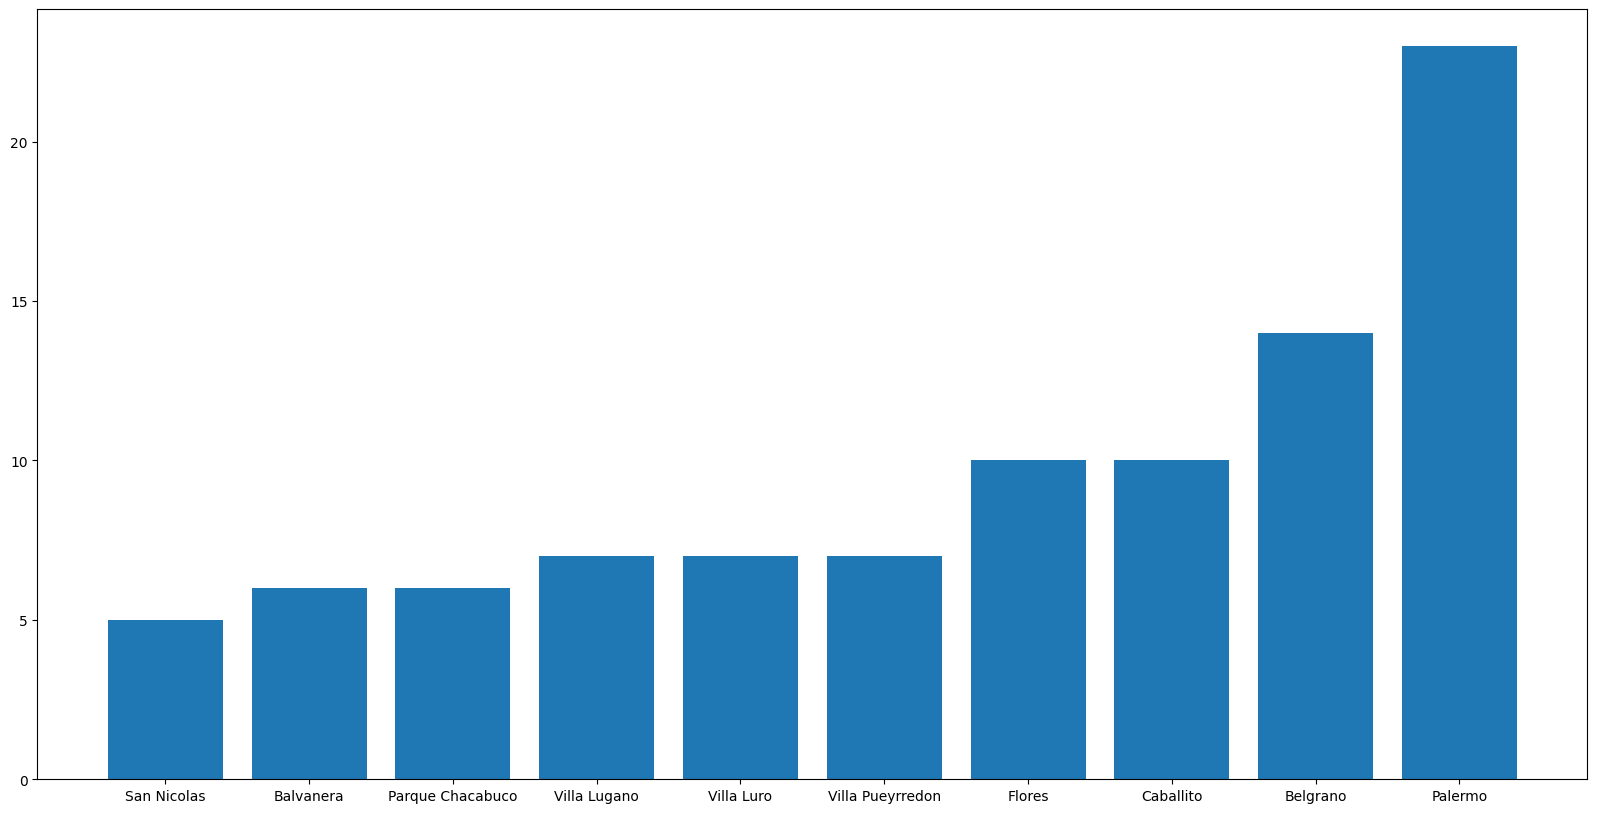

In [63]:
_ = plt.figure(figsize=(20,10))
_ = plt.bar(barrios_ms_2022.index, barrios_ms_2022.values)

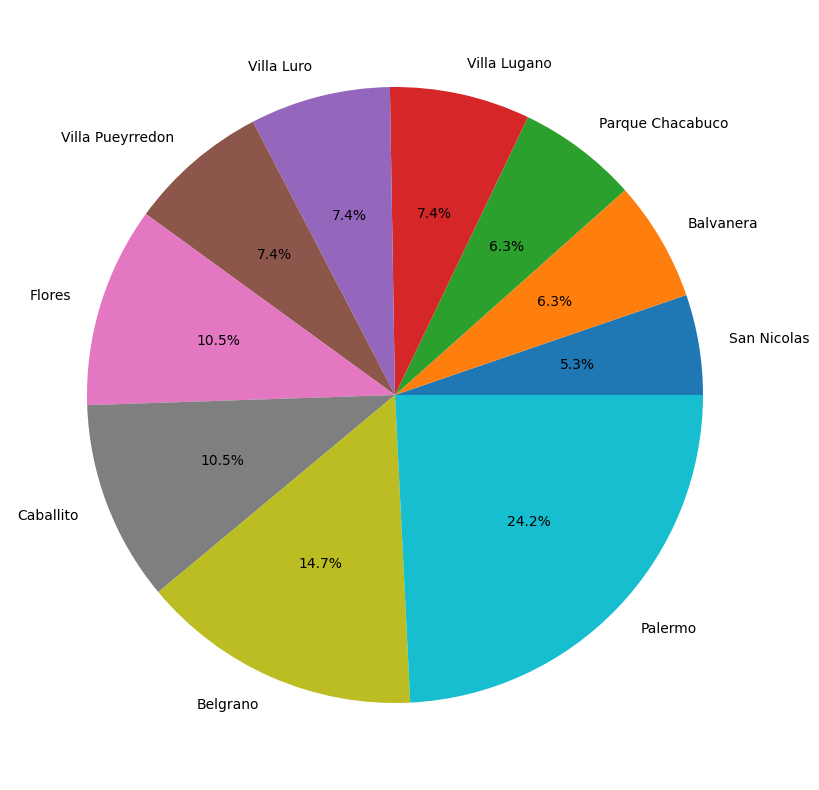

In [64]:
_ = plt.figure(figsize=(20,10))
_ = plt.pie(barrios_ms_2022.values, labels=barrios_ms_2022.index, autopct='%1.1f%%')

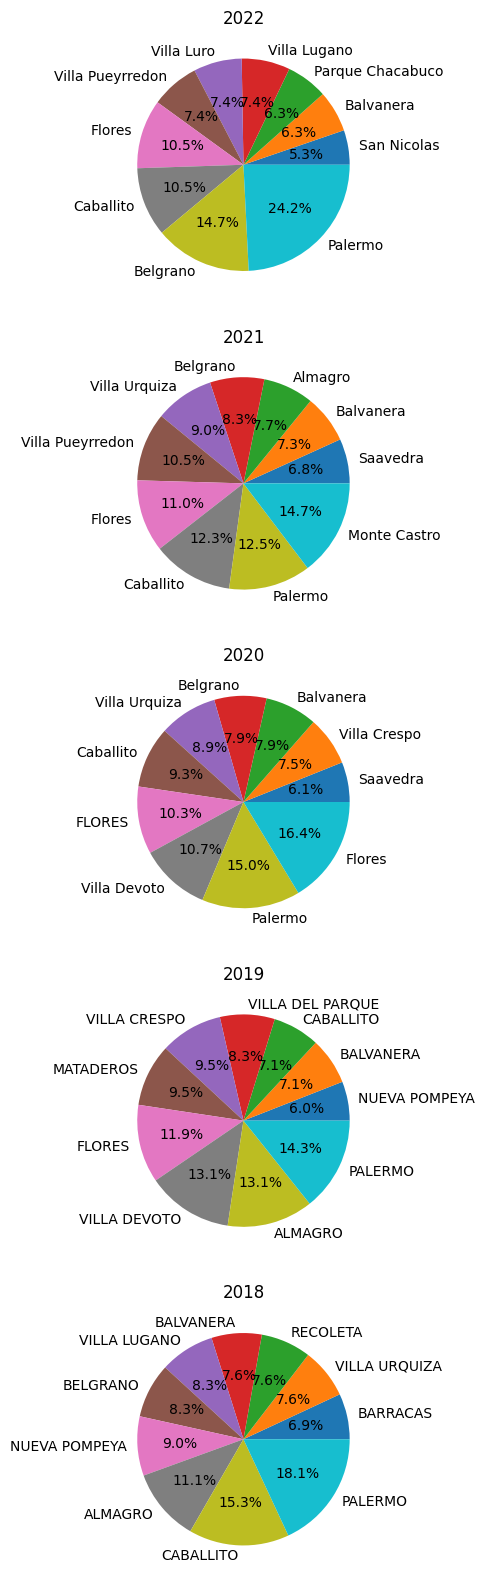

In [65]:
# Plot all years in one fig, with a subplot for each year

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

for i, (k, v) in enumerate(mosquitos.items()):
    axs[i].pie(v['domicilio_barrio'].value_counts()[0:10][::-1].values, labels=v['domicilio_barrio'].value_counts()[0:10][::-1].index, autopct='%1.1f%%')
    axs[i].set_title(k)

plt.show()

In [66]:
len(mosquitos_2021)

1060

In [67]:
canales = mosquitos_2021["canal"].value_counts()

total = sum(canales.values)

# Percentage of denuncias by canal

for k, v in canales.items():
    print(f"{k}: {round(v/total*100, 2)}%")

GCS Web: 47.55%
App BA 147: 39.15%
Call Center: 5.47%
Boti: 4.72%
Operador GCBA: 1.7%
Comuna: 0.85%
Mail 147: 0.47%
Operador FIXIT: 0.09%
